# Tc2c on all 5 chuvio samples - 2 sets close and for TU / LB

In [1]:
#Currently creating the datasets

In [4]:
import os
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib
import anndata

import scanpy as sc
import cell2cell as c2c

import liana as li
import plotnine as p9

from tqdm.auto import tqdm

from tqdm.auto import tqdm
from anndata import read_h5ad
import sys

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/pkgs/miniforge3/envs/CellPhoneDB/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/pkgs/miniforge3/envs/CellPhoneDB/lib/python3.11/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# importing datasets
path = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Liana+/rank_aggregate/Liana_RA_subsetTULB/anndata_subsetTULB/'

chuvio_L1_1_TULB = sc.read_h5ad('/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Liana+/rank_aggregate/Liana_RA_subsetTULB/anndata_subsetTULB/chuvio_L1_1_TULB.h5ad')
chuvio_L1_2_TULB = sc.read_h5ad('/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Liana+/rank_aggregate/Liana_RA_subsetTULB/anndata_subsetTULB/chuvio_L1_2_TULB.h5ad')
chuvio_L2_1_TULB = sc.read_h5ad('/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Liana+/rank_aggregate/Liana_RA_subsetTULB/anndata_subsetTULB/chuvio_L2_1_TULB.h5ad')
chuvio_L3_1_TULB = sc.read_h5ad('/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Liana+/rank_aggregate/Liana_RA_subsetTULB/anndata_subsetTULB/chuvio_L3_1_TULB.h5ad')
chuvio_L4_1_TULB = sc.read_h5ad('/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Liana+/rank_aggregate/Liana_RA_subsetTULB/anndata_subsetTULB/chuvio_L4_1_TULB.h5ad')

TU01plusLB_chuvio_L1_1 = sc.read_h5ad(f'{path}TU01plusLB_chuvio_L1_1.h5ad')
TU01plusLB_chuvio_L1_2 = sc.read_h5ad(f'{path}TU01plusLB_chuvio_L1_2.h5ad')
TU01plusLB_chuvio_L2_1 = sc.read_h5ad(f'{path}TU01plusLB_chuvio_L2_1.h5ad')
TU01plusLB_chuvio_L3_1 = sc.read_h5ad(f'{path}TU01plusLB_chuvio_L3_1.h5ad')
TU01plusLB_chuvio_L4_1 = sc.read_h5ad(f'{path}TU01plusLB_chuvio_L4_1.h5ad')

TU_MINUS01plusLB_chuvio_L1_1 = sc.read_h5ad(f'{path}TU_MINUS01plusLB_chuvio_L1_1.h5ad')
TU_MINUS01plusLB_chuvio_L1_2 = sc.read_h5ad(f'{path}TU_MINUS01plusLB_chuvio_L1_2.h5ad')
TU_MINUS01plusLB_chuvio_L2_1 = sc.read_h5ad(f'{path}TU_MINUS01plusLB_chuvio_L2_1.h5ad')
TU_MINUS01plusLB_chuvio_L3_1 = sc.read_h5ad(f'{path}TU_MINUS01plusLB_chuvio_L3_1.h5ad')
TU_MINUS01plusLB_chuvio_L4_1 = sc.read_h5ad(f'{path}TU_MINUS01plusLB_chuvio_L4_1.h5ad')

### add sample code and concatenate the samples

In [7]:
# add the sample code 
chuvio_L1_1_TULB.obs["sample"] = "chuvio_L1_1_TULB"
chuvio_L1_1_TULB.obs["sample"] = "chuvio_L1_2_TULB"
chuvio_L2_1_TULB.obs["sample"] = "chuvio_L2_1_TULB"
chuvio_L3_1_TULB.obs["sample"] = "chuvio_L3_1_TULB"
chuvio_L4_1_TULB.obs["sample"] = "chuvio_L4_1_TULB"

chuvio_L1_1_TULB.obs["condition"] = "all_distance"
chuvio_L1_1_TULB.obs["condition"] = "all_distance"
chuvio_L2_1_TULB.obs["condition"] = "all_distance"
chuvio_L3_1_TULB.obs["condition"] = "all_distance"
chuvio_L4_1_TULB.obs["condition"] = "all_distance"


TU01plusLB_chuvio_L1_1.obs["sample"] = "TU01plusLB_chuvio_L1_1"
TU01plusLB_chuvio_L1_2.obs["sample"] = "TU01plusLB_chuvio_L1_2"
TU01plusLB_chuvio_L2_1.obs["sample"] = "TU01plusLB_chuvio_L2_1"
TU01plusLB_chuvio_L3_1.obs["sample"] = "TU01plusLB_chuvio_L3_1"
TU01plusLB_chuvio_L4_1.obs["sample"] = "TU01plusLB_chuvio_L4_1"

TU01plusLB_chuvio_L1_1.obs["condition"] = "short_distance"
TU01plusLB_chuvio_L1_2.obs["condition"] = "short_distance"
TU01plusLB_chuvio_L2_1.obs["condition"] = "short_distance"
TU01plusLB_chuvio_L3_1.obs["condition"] = "short_distance"
TU01plusLB_chuvio_L4_1.obs["condition"] = "short_distance"

TU_MINUS01plusLB_chuvio_L1_1.obs["sample"] = "TU_MINUS01plusLB_chuvio_L1_1"
TU_MINUS01plusLB_chuvio_L1_2.obs["sample"] = "TU_MINUS01plusLB_chuvio_L1_2"
TU_MINUS01plusLB_chuvio_L2_1.obs["sample"] = "TU_MINUS01plusLB_chuvio_L2_1"
TU_MINUS01plusLB_chuvio_L3_1.obs["sample"] = "TU_MINUS01plusLB_chuvio_L3_1"
TU_MINUS01plusLB_chuvio_L4_1.obs["sample"] = "TU_MINUS01plusLB_chuvio_L4_1"

TU_MINUS01plusLB_chuvio_L1_1.obs["condition"] = "long_distance"
TU_MINUS01plusLB_chuvio_L1_2.obs["condition"] = "long_distance"
TU_MINUS01plusLB_chuvio_L2_1.obs["condition"] = "long_distance"
TU_MINUS01plusLB_chuvio_L3_1.obs["condition"] = "long_distance"
TU_MINUS01plusLB_chuvio_L4_1.obs["condition"] = "long_distance"

In [8]:
#concatenate the samples :
adata = anndata.concat([TU01plusLB_chuvio_L1_1, TU01plusLB_chuvio_L1_2, TU01plusLB_chuvio_L2_1, TU01plusLB_chuvio_L3_1, TU01plusLB_chuvio_L4_1,
                       TU_MINUS01plusLB_chuvio_L1_1, TU_MINUS01plusLB_chuvio_L1_2, TU_MINUS01plusLB_chuvio_L2_1, TU_MINUS01plusLB_chuvio_L3_1, TU_MINUS01plusLB_chuvio_L4_1], index_unique=None, join='outer')

In [9]:
adata.obs_names_make_unique()

### OUT dot plot

# 1. Preprocessing expression data - Conditon

In [11]:
adata.obs.condition.unique()

array(['short_distance', 'long_distance'], dtype=object)

## 2.6 RUN Liana by sample 

## OUT getting significant interactions foreach sample

In [38]:
adata.obs['sample']

L1_1_aancceck-1            TU01plusLB_chuvio_L1_1
L1_1_aannhgnn-1            TU01plusLB_chuvio_L1_1
L1_1_aaofalmf-1            TU01plusLB_chuvio_L1_1
L1_1_aaogoanh-1            TU01plusLB_chuvio_L1_1
L1_1_abbbalbl-1            TU01plusLB_chuvio_L1_1
                                 ...             
L4_1_oigjcdme-1-1    TU_MINUS01plusLB_chuvio_L4_1
L4_1_oijcdofl-1-1    TU_MINUS01plusLB_chuvio_L4_1
L4_1_oijeiaij-1-1    TU_MINUS01plusLB_chuvio_L4_1
L4_1_oilkknda-1-1    TU_MINUS01plusLB_chuvio_L4_1
L4_1_oilnmief-1-1    TU_MINUS01plusLB_chuvio_L4_1
Name: sample, Length: 34654, dtype: category
Categories (10, object): ['TU01plusLB_chuvio_L1_1', 'TU01plusLB_chuvio_L1_2', 'TU01plusLB_chuvio_L2_1', 'TU01plusLB_chuvio_L3_1', ..., 'TU_MINUS01plusLB_chuvio_L1_2', 'TU_MINUS01plusLB_chuvio_L2_1', 'TU_MINUS01plusLB_chuvio_L3_1', 'TU_MINUS01plusLB_chuvio_L4_1']

In [60]:
# pick a sample to infer the communication scores for
sample_name = 'TU_MINUS01plusLB_chuvio_L4_1'
sadata = adata[adata.obs['sample']==sample_name]
sadata

li.method.rank_aggregate(sadata,
                           groupby='singler_annotation',
                           resource_name = 'consensus',
                           expr_prop=0.1, # must be expressed in expr_prop fraction of cells
                           min_cells = 5,
                           n_perms = 1000,
                           use_raw = False, # run on log- and library-normalized counts
                           verbose = True,
                           inplace = True
                          )

TU_MINUS01plusLB_chuvio_L4_1 = sadata.uns['liana_res'].copy()

Using `.X`!
22 features of mat are empty, they will be removed.
Make sure that normalized counts are passed!
Using resource `consensus`.
0.91 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 14611 samples and 313 features
Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


100%|██████████| 1000/1000 [00:01<00:00, 742.03it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR
Running CellChat


100%|██████████| 1000/1000 [00:16<00:00, 60.03it/s]


In [81]:
TU01plusLB_chuvio_L1_1

,source,target,ligand_complex,receptor_complex,lr_means,cellphone_pvals,expr_prod,scaled_weight,lr_logfc,spec_weight,lrscore,lr_probs,cellchat_pvals,specificity_rank,magnitude_rank
71,Tu_L1_SFTPB,Tu_L1_SFTPB,VEGFA,CD44,6.866227,0.000,45.805977,0.494799,33.273232,0.665268,0.930611,0.015280,0.000,0.038039,0.000103
32,B cells,Tu_L1_SFTPB,VIM,CD44,4.894728,0.000,23.295265,0.409188,12.634020,0.478267,0.905341,0.008789,0.000,0.038039,0.001034
49,Tu_L1_SFTPB,B cells,VEGFA,CD44,5.398072,0.000,22.246744,0.112752,10.091671,0.323103,0.903350,0.006766,0.000,0.203299,0.002702
44,Tu_L1_SFTPB,B cells,HMGB1,CXCR4,4.095243,0.000,14.792968,0.568700,16.505281,0.741511,0.884012,0.004119,0.000,0.038039,0.006312
19,B cells,B cells,VIM,CD44,3.426573,0.893,11.313890,0.027141,-10.547541,0.232282,0.869543,0.003878,0.039,1.000000,0.012582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,Tu_L1_SFTPB,Tu_L1_SFTPB,TNFSF13,TNFRSF13B,0.510033,0.000,0.191206,0.090734,0.832755,0.278797,0.464238,0.000000,1.000,1.000000,1.000000
1,B cells,B cells,C3,IFITM1,0.680070,1.000,0.293706,-0.400408,-17.989113,0.034191,0.517823,0.000000,1.000,1.000000,1.000000
5,B cells,B cells,CXCL12,CXCR4,1.489510,0.000,0.780319,0.404607,2.736943,0.669918,0.636426,0.000000,1.000,0.352447,1.000000
12,B cells,B cells,HLA-DRA,CD4,1.139861,0.000,0.479180,0.177517,2.578486,0.392548,0.578367,0.000000,1.000,0.777699,1.000000


In [73]:
data = [TU01plusLB_chuvio_L1_1, TU01plusLB_chuvio_L1_2, TU01plusLB_chuvio_L2_1, TU01plusLB_chuvio_L3_1, TU01plusLB_chuvio_L4_1, TU_MINUS01plusLB_chuvio_L1_1, TU_MINUS01plusLB_chuvio_L1_2, TU_MINUS01plusLB_chuvio_L2_1, TU_MINUS01plusLB_chuvio_L3_1, TU_MINUS01plusLB_chuvio_L4_1]
values = [len(item) for item in data]
data_lab = [
    "L1_1 short distance",
    "L1_2 short distance",
    "L2_1 short distance",
    "L3_1 short distance",
    "L4_1 short distance",
    "L1_1 long distance",
    "L1_2 long distance",
    "L2_1 long distance",
    "L3_1 long distance",
    "L4_1 long distance"
]

In [70]:
values 

[74, 62, 89, 168, 71, 585, 73, 75, 198, 58]

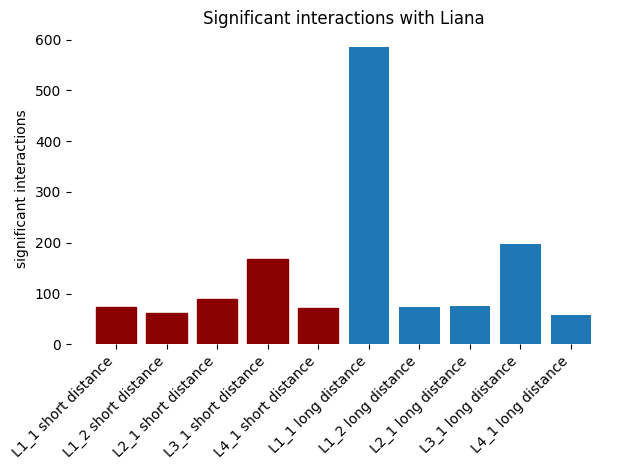

In [76]:
bars = plt.bar(data_lab, values)

# Color the first five bars in dark red
for i in range(5):
    bars[i].set_color('darkred')

# Add labels and title
plt.ylabel('significant interactions')
plt.title('Significant interactions with Liana')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.box(False)
plt.show()

In [ ]:
data = [TU01plusLB_chuvio_L1_1, TU01plusLB_chuvio_L1_2, TU01plusLB_chuvio_L2_1, TU01plusLB_chuvio_L3_1, TU01plusLB_chuvio_L4_1, TU_MINUS01plusLB_chuvio_L1_1, TU_MINUS01plusLB_chuvio_L1_2, TU_MINUS01plusLB_chuvio_L2_1, TU_MINUS01plusLB_chuvio_L3_1, TU_MINUS01plusLB_chuvio_L4_1]

In [ ]:
# pick a sample to infer the communication scores for
sample_name = 'TU01plusLB_chuvio_L1_1'
sadata = adata[adata.obs['sample']==sample_name]
sadata

## 1 Initial Setup

In [82]:
data_folder = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astearAnalysis/TensorC2C/data/liana-outputs/'
output_folder = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/TensorC2C/data/tc2c-outputs/'
c2c.io.directories.create_directory(output_folder)

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/TensorC2C/data/tc2c-outputs/ already exists.


In [83]:
li.mt.rank_aggregate.by_sample(adata,
                                   sample_key='sample',
                                   groupby='singler_annotation',
                                   resource_name = 'consensus',
                                   expr_prop=0.1, # must be expressed in expr_prop fraction of cells
                                   min_cells = 5,
                                   n_perms = 100,
                                   use_raw = False, # run on log- and library-normalized counts
                                   verbose = True,
                                   inplace = True
                                  )

Now running: TU_MINUS01plusLB_chuvio_L4_1: 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


In [84]:
liana_res = adata.uns['liana_res']

In [85]:
liana_res

,sample,source,target,ligand_complex,receptor_complex,lr_means,cellphone_pvals,expr_prod,scaled_weight,lr_logfc,spec_weight,lrscore,lr_probs,cellchat_pvals,specificity_rank,magnitude_rank
0,TU01plusLB_chuvio_L1_1,Tu_L1_SFTPB,Tu_L1_SFTPB,VEGFA,CD44,6.866227,0.00,45.805977,0.494799,33.273232,0.665268,0.930611,0.015280,0.00,0.041106,0.000103
1,TU01plusLB_chuvio_L1_1,B cells,Tu_L1_SFTPB,VIM,CD44,4.894728,0.00,23.295265,0.409188,12.634020,0.478267,0.905341,0.008789,0.00,0.041106,0.001034
2,TU01plusLB_chuvio_L1_1,Tu_L1_SFTPB,B cells,VEGFA,CD44,5.398072,0.00,22.246744,0.112752,10.091671,0.323103,0.903350,0.006766,0.00,0.203299,0.002702
3,TU01plusLB_chuvio_L1_1,Tu_L1_SFTPB,B cells,HMGB1,CXCR4,4.095243,0.00,14.792968,0.568700,16.505281,0.741511,0.884012,0.004119,0.00,0.041106,0.006312
4,TU01plusLB_chuvio_L1_1,B cells,B cells,VIM,CD44,3.426573,0.95,11.313890,0.027141,-10.547541,0.232282,0.869543,0.003878,0.05,1.000000,0.012582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,TU_MINUS01plusLB_chuvio_L4_1,Fibroblasts tumour_B3,Fibroblasts tumour_B3,TIMP2,CD44,1.127091,1.00,0.767609,-0.223877,-11.583093,0.155007,0.730802,0.000000,1.00,1.000000,1.000000
931,TU_MINUS01plusLB_chuvio_L4_1,B cells,B cells,C3,IFITM1,0.750905,0.00,0.370762,0.008004,9.158424,0.611292,0.653585,0.000000,1.00,0.565384,1.000000
932,TU_MINUS01plusLB_chuvio_L4_1,B cells,Fibroblasts tumour_B3,C3,IFITM1,0.655366,1.00,0.143317,-0.148691,8.405651,0.236294,0.539812,0.000000,1.00,1.000000,1.000000
933,TU_MINUS01plusLB_chuvio_L4_1,Fibroblasts tumour_B3,B cells,TNFSF13,TNFRSF13B,0.385381,0.57,0.096448,-0.010278,0.875598,0.431290,0.490390,0.000000,1.00,1.000000,1.000000


In [90]:
liana_res.sort_values(by='specificity_rank')

,sample,source,target,ligand_complex,receptor_complex,lr_means,cellphone_pvals,expr_prod,scaled_weight,lr_logfc,spec_weight,lrscore,lr_probs,cellchat_pvals,specificity_rank,magnitude_rank
679,TU_MINUS01plusLB_chuvio_L3_1,Tu_L3_G0S2,Tu_L3_G0S2,FN1,CD44,9.033452,0.0,75.159454,0.901404,67.465668,0.640385,0.948503,0.018903,0.0,0.001263,0.000007
137,TU01plusLB_chuvio_L2_1,Tu_L2_FXYD2,B cells,HMGB1,CXCR4,2.321889,0.0,3.208327,0.617006,10.087525,0.692851,0.809445,0.002033,0.0,0.002710,0.001404
141,TU01plusLB_chuvio_L2_1,Tu_L2_FXYD2,B cells,TIMP2,CD44,1.308919,0.0,1.711484,0.457681,8.415155,0.618553,0.756247,0.000987,0.0,0.002710,0.054931
138,TU01plusLB_chuvio_L2_1,Tu_L2_FXYD2,B cells,VEGFA,CD44,1.959422,0.0,3.359425,0.463374,17.997913,0.699293,0.812969,0.001479,0.0,0.002710,0.007326
151,TU01plusLB_chuvio_L2_1,Tu_L2_FXYD2,B cells,FN1,CD79A,1.020476,0.0,0.683464,0.470547,7.098951,0.616237,0.662229,0.000247,0.0,0.002710,0.198004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,TU_MINUS01plusLB_chuvio_L1_1,B cells,B cells,TNFSF13B,TNFRSF13B,0.340909,0.0,0.063768,0.193805,0.613589,0.468797,0.343536,0.000000,1.0,1.000000,1.000000
526,TU_MINUS01plusLB_chuvio_L1_1,B cells,Tu_L1_SFTPB,FN1,CD44,2.759808,0.0,1.361205,0.120638,5.148799,0.211654,0.707414,0.000000,1.0,1.000000,1.000000
120,TU01plusLB_chuvio_L1_2,B cells,B cells,FN1,CD79A,1.256411,0.0,0.622936,0.210982,0.391404,0.293943,0.645011,0.000000,1.0,1.000000,1.000000
511,TU_MINUS01plusLB_chuvio_L1_1,B cells,B cells,HLA-DRB5,CD4,0.562937,0.0,0.208873,0.194898,1.204935,0.447495,0.486418,0.000000,1.0,1.000000,1.000000


## OUT Samples Dotplot

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


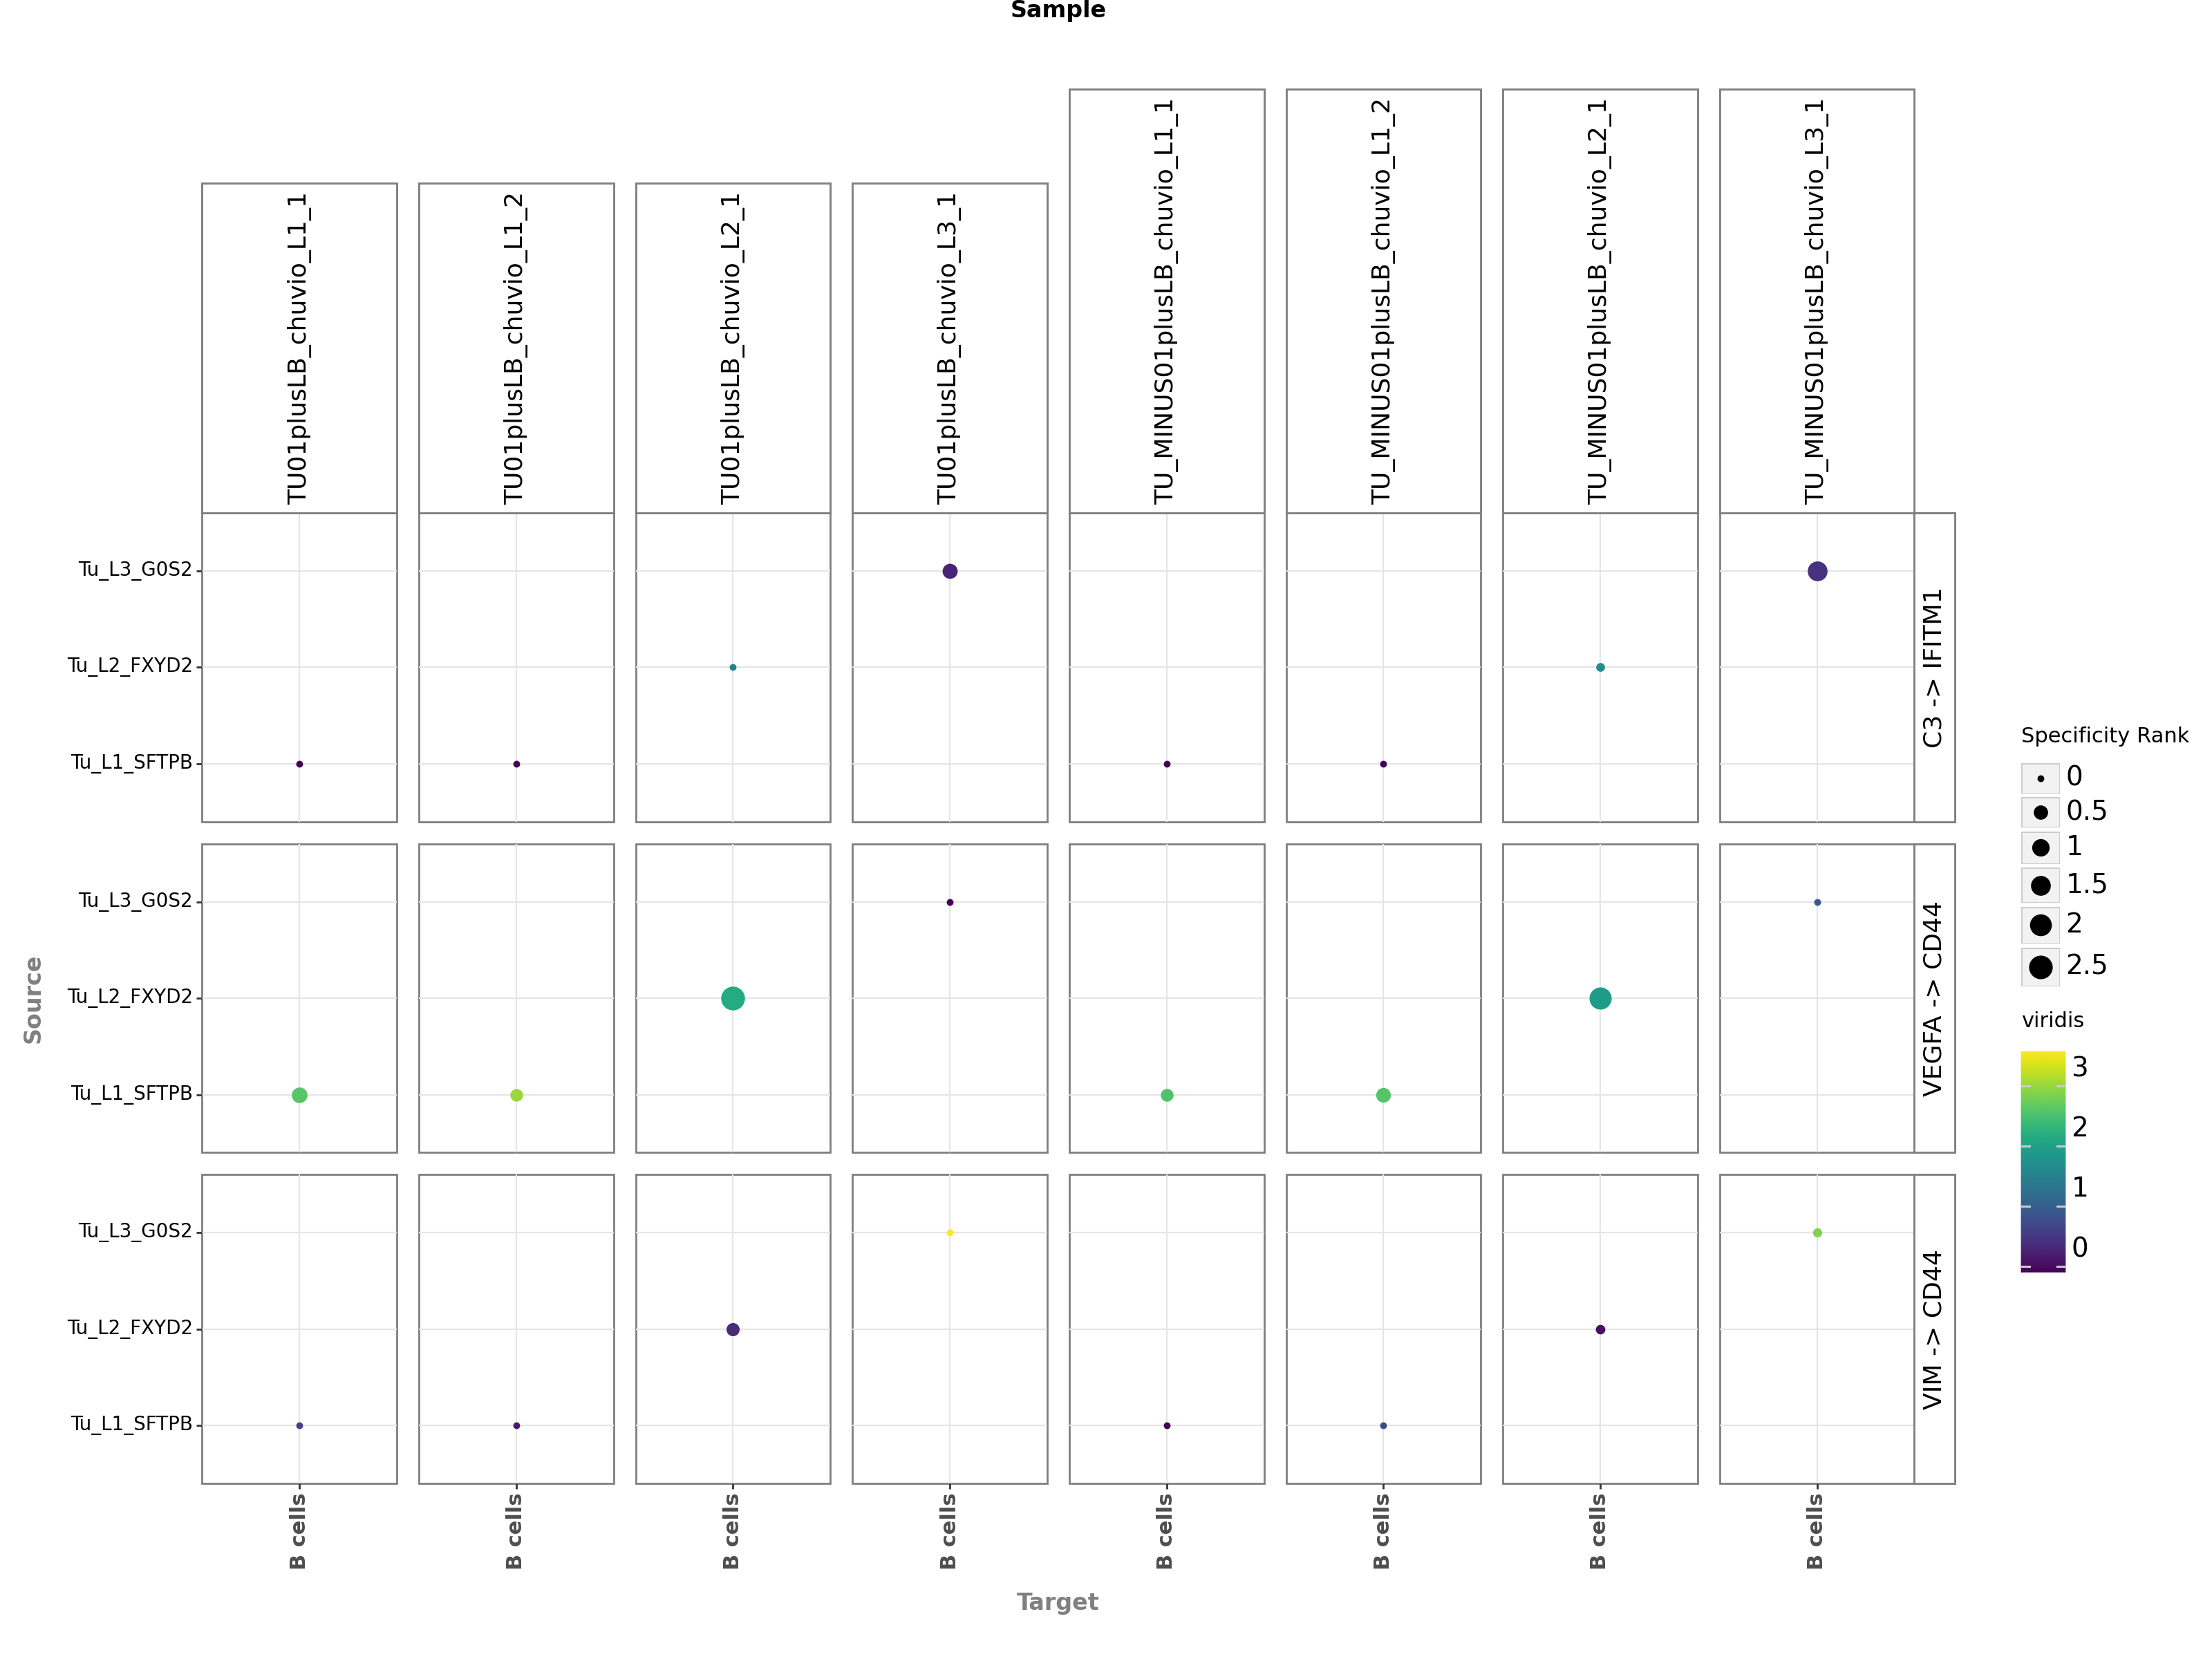

<Figure Size: (1600 x 1200)>

In [96]:
plot = (li.pl.dotplot_by_sample(adata=adata,
                               colour='magnitude_rank',
                               size='specificity_rank',
                               source_labels=["Tu_L1_SFTPB", "Tu_L2_FXYD2", "Tu_L3_G0S2"],
                               target_labels=["B cells"],
                               ligand_complex = ['VIM', 'VEGFA', 'C3'],
                               receptor_complex= ['CD44', 'IFITM1'],
                               sample_key='sample',
                               inverse_colour=True,
                               inverse_size=True,
                               figure_size=(16, 12),
                               size_range=(1, 6),
                               ) +
         p9.labs(color='Magnitude rank', size='Specificity Rank'))
plot

## 3.2 Create 4D-Communication Tensor

Specifying the context. In the original they have 12 samples and the first letter tells them if it is Control or sick, so the following ordering operation allows it to setup the order of samples depending on the context. We jsut want to see the dfference between L4 that has two LSE and the others. 

In [101]:
sorted_samples = sorted(liana_res['sample'].unique())

In [102]:
sorted_samples

['TU01plusLB_chuvio_L1_1',
 'TU01plusLB_chuvio_L1_2',
 'TU01plusLB_chuvio_L2_1',
 'TU01plusLB_chuvio_L3_1',
 'TU01plusLB_chuvio_L4_1',
 'TU_MINUS01plusLB_chuvio_L1_1',
 'TU_MINUS01plusLB_chuvio_L1_2',
 'TU_MINUS01plusLB_chuvio_L2_1',
 'TU_MINUS01plusLB_chuvio_L3_1',
 'TU_MINUS01plusLB_chuvio_L4_1']

## 3.3 Generate tensor

To generate the 4D-communication tensor, we will to create matrices with the communication scores for each of the ligand-receptor pairs within the same sample, then generate a 3D tensor for each sample, and finally concatenate them to form the 4D tensor.

Briefly, we use the LIANA dataframe and communication scores to organize them as follows:
-> If you used a pipeline that generated negative scores, replace these with 0,  Otherwise, by default, Tensor-cell2cell will treat these as NaN.
-> ...

In [47]:
adata.X

<34654x335 sparse matrix of type '<class 'numpy.float64'>'
	with 1699667 stored elements in Compressed Sparse Row format>

In [48]:
#Here we use the magnitude score but we could use the specificity score, in score_key. Also try lowering the outer_fraction value for rare occurences
tensor = li.multi.to_tensor_c2c(liana_res=liana_res, # LIANA's dataframe containing results
                                sample_key='sample', # Column name of the samples
                                source_key='source', # Column name of the sender cells
                                target_key='target', # Column name of the receiver cells
                                ligand_key='ligand_complex', # Column name of the ligands
                                receptor_key='receptor_complex', # Column name of the receptors
                                score_key='magnitude_rank', # Column name of the communication scores to use
                                non_negative = True, # set negative values to 0
                                inverse_fun=lambda x: 1 - x, # Transformation function
                                non_expressed_fill=None, # Value to replace missing values with
                                how='outer', # What to include across all samples
                                lr_fill=np.nan, # What to fill missing LRs with
                                cell_fill = np.nan, # What to fill missing cell types with
                                outer_fraction=1/10., # Fraction of samples as threshold to include cells and LR pairs.
                                lr_sep='^', # How to separate ligand and receptor names to name LR pair
                                context_order=sorted_samples, # Order to store the contexts in the tensor
                                sort_elements=True # Whether sorting alphabetically element names of each tensor dim. Does not apply for context order if context_order is passed.
                               )

100%|██████████| 10/10 [00:00<00:00, 12.46it/s]


In [49]:
tensor.shape

(10, 88, 5, 5)

## 3.4 Prepare Tensor Metadata

In [51]:
from collections import defaultdict

element_dict = defaultdict(lambda: 'Unknown')

In [104]:
context_dict = adata.obs.set_index('sample')['condition'].sort_values().to_dict()

In [105]:
context_dict

{'TU_MINUS01plusLB_chuvio_L4_1': 'long_distance',
 'TU_MINUS01plusLB_chuvio_L2_1': 'long_distance',
 'TU_MINUS01plusLB_chuvio_L3_1': 'long_distance',
 'TU_MINUS01plusLB_chuvio_L1_2': 'long_distance',
 'TU_MINUS01plusLB_chuvio_L1_1': 'long_distance',
 'TU01plusLB_chuvio_L1_1': 'short_distance',
 'TU01plusLB_chuvio_L4_1': 'short_distance',
 'TU01plusLB_chuvio_L2_1': 'short_distance',
 'TU01plusLB_chuvio_L3_1': 'short_distance',
 'TU01plusLB_chuvio_L1_2': 'short_distance'}

In [106]:
dimensions_dict = [context_dict, None, None, None]

In [288]:
#liana_res

## 3.5 Prepare Tensor Metadata -> Selecting the context

In [56]:
meta_tensor = c2c.tensor.generate_tensor_metadata(interaction_tensor=tensor,
                                              metadata_dicts=[context_dict, None, None, None],
                                              fill_with_order_elements=True
                                             )

In [57]:
pd.__version__

'2.2.0'

In [58]:
tensor.shape

(10, 88, 5, 5)

## 3.6 Exporting tensors

In [59]:
c2c.io.export_variable_with_pickle(tensor, output_folder + 'BALF-Tensor-5chuv_TU_LB_23_04_24.pkl')

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/TensorC2C/data/tc2c-outputs/BALF-Tensor-5chuv_TU_LB_23_04_24.pkl  was correctly saved.


In [60]:
c2c.io.export_variable_with_pickle(meta_tensor, output_folder + 'BALF-Tensor-5chuv_TU_LB_Metadata_23_04_24.pkl')

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/TensorC2C/data/tc2c-outputs/BALF-Tensor-5chuv_TU_LB_Metadata_23_04_24.pkl  was correctly saved.


## 4. Running Tensor-cell2cell to perform a tensor factorization

In [ ]:
# done in the cluster

In [98]:
factors = c2c.io.load_tensor_factors(output_folder + '/Loadings.xlsx')

In [99]:
factors

OrderedDict([('Contexts',
                                            Factor 1  Factor 2  Factor 3  Factor 4  \
              TU01plusLB_chuvio_L1_1        0.009552  0.227249  0.481984  0.212557   
              TU01plusLB_chuvio_L1_2        0.002108  0.136908  0.468972  0.071059   
              TU01plusLB_chuvio_L2_1        0.000662  0.492715  0.200569  0.309099   
              TU01plusLB_chuvio_L3_1        0.700873  0.395501  0.000068  0.023962   
              TU01plusLB_chuvio_L4_1        0.196193  0.210672  0.127147  0.581037   
              TU_MINUS01plusLB_chuvio_L1_1  0.010903  0.220948  0.458429  0.313195   
              TU_MINUS01plusLB_chuvio_L1_2  0.018452  0.006815  0.473810  0.026768   
              TU_MINUS01plusLB_chuvio_L2_1  0.045838  0.559854  0.236655  0.040302   
              TU_MINUS01plusLB_chuvio_L3_1  0.485229  0.343056  0.000104  0.147620   
              TU_MINUS01plusLB_chuvio_L4_1  0.481852  0.077813  0.026513  0.627555   
              
             

In [108]:
context_dict

{'TU_MINUS01plusLB_chuvio_L4_1': 'long_distance',
 'TU_MINUS01plusLB_chuvio_L2_1': 'long_distance',
 'TU_MINUS01plusLB_chuvio_L3_1': 'long_distance',
 'TU_MINUS01plusLB_chuvio_L1_2': 'long_distance',
 'TU_MINUS01plusLB_chuvio_L1_1': 'long_distance',
 'TU01plusLB_chuvio_L1_1': 'short_distance',
 'TU01plusLB_chuvio_L4_1': 'short_distance',
 'TU01plusLB_chuvio_L2_1': 'short_distance',
 'TU01plusLB_chuvio_L3_1': 'short_distance',
 'TU01plusLB_chuvio_L1_2': 'short_distance'}

AttributeError: module 'seaborn.categorical' has no attribute '_BoxPlotter'

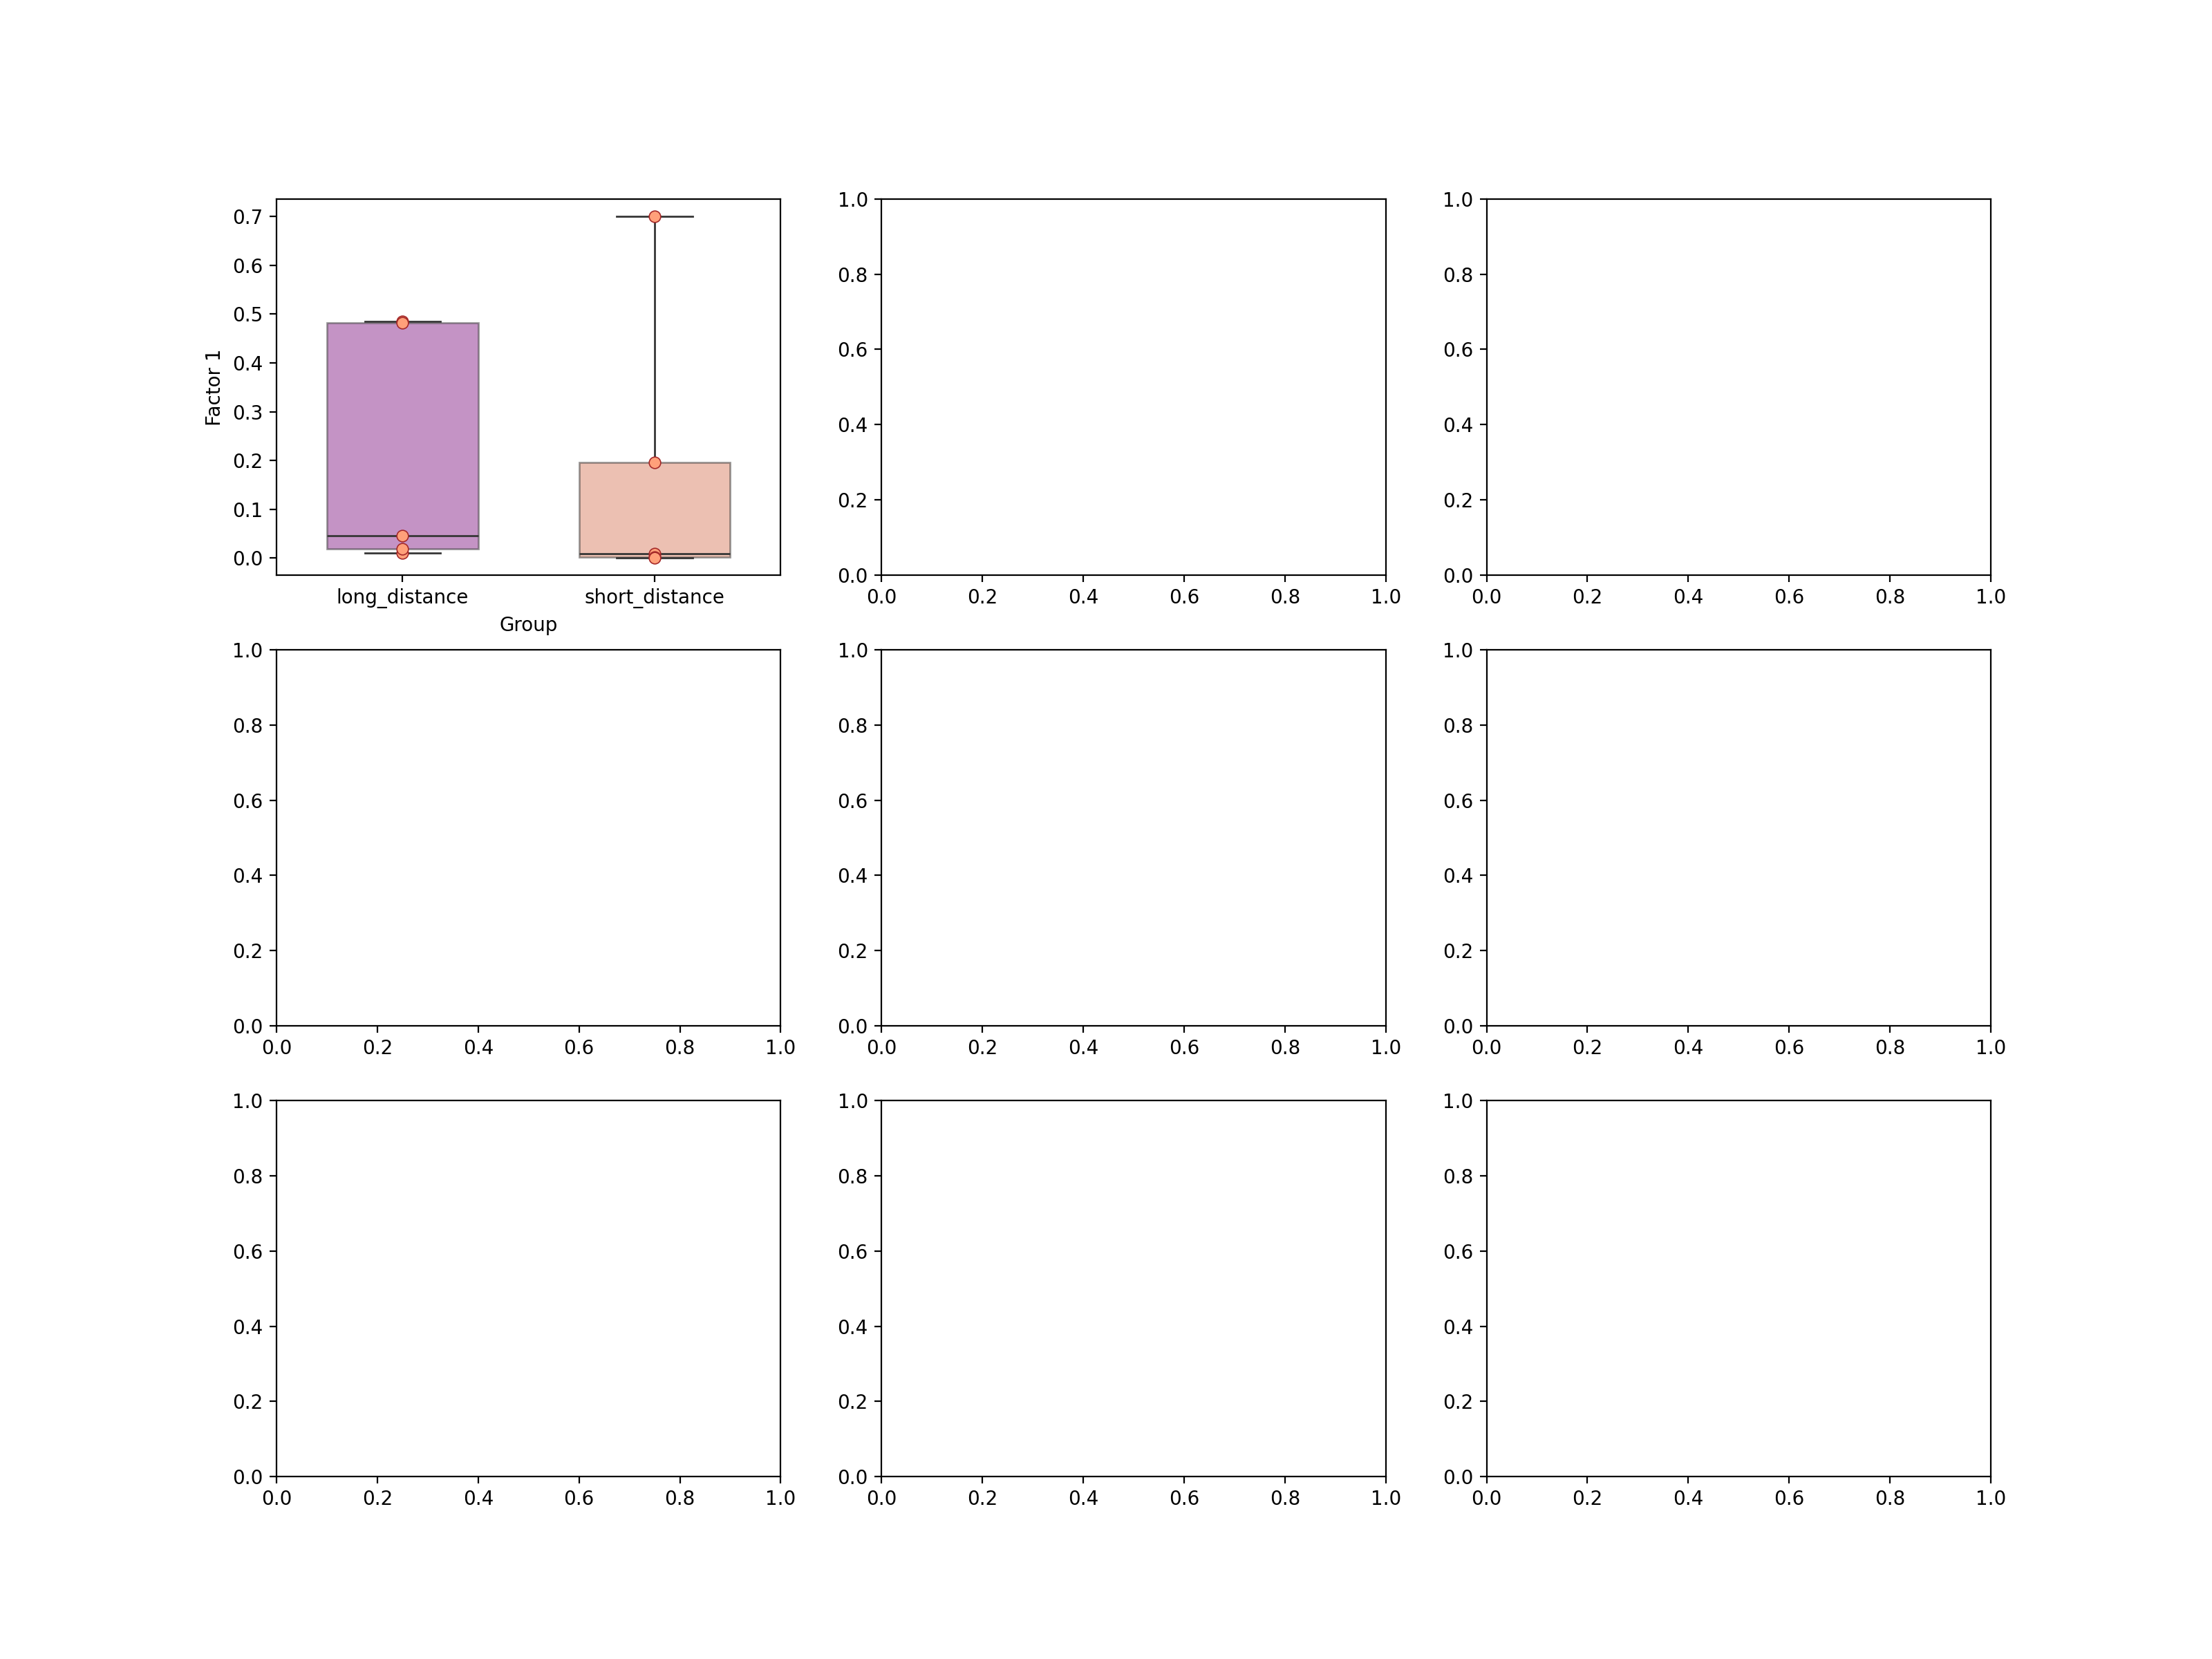

In [110]:

groups_order = ['long_distance', 'short_distance']
fig_filename = output_folder + '/BALF-Severity-Boxplots.pdf'

_ = c2c.plotting.context_boxplot(context_loadings=factors['Contexts'],
                                 metadict=context_dict,
                                 nrows=3,
                                 figsize=(16, 12),
                                 group_order=groups_order,
                                 statistical_test='t-test_ind',
                                 pval_correction='fdr_bh',
                                 cmap='plasma',
                                 verbose=False,
                                 filename=fig_filename
                                )

In [113]:
# Generate color by COVID-19 severity for each sample
condition_colors = c2c.plotting.aesthetics.get_colors_from_labels(['long_distance', 'short_distance'],
                                                                  cmap='plasma')

# Map these colors to each sample name
color_dict = {k : condition_colors[v] for k, v in context_dict.items()}

# Generate a dataframe used as input for the clustermap
col_colors = pd.Series(color_dict)
col_colors = col_colors.to_frame()
col_colors.columns = ['COVID-19 Severity']

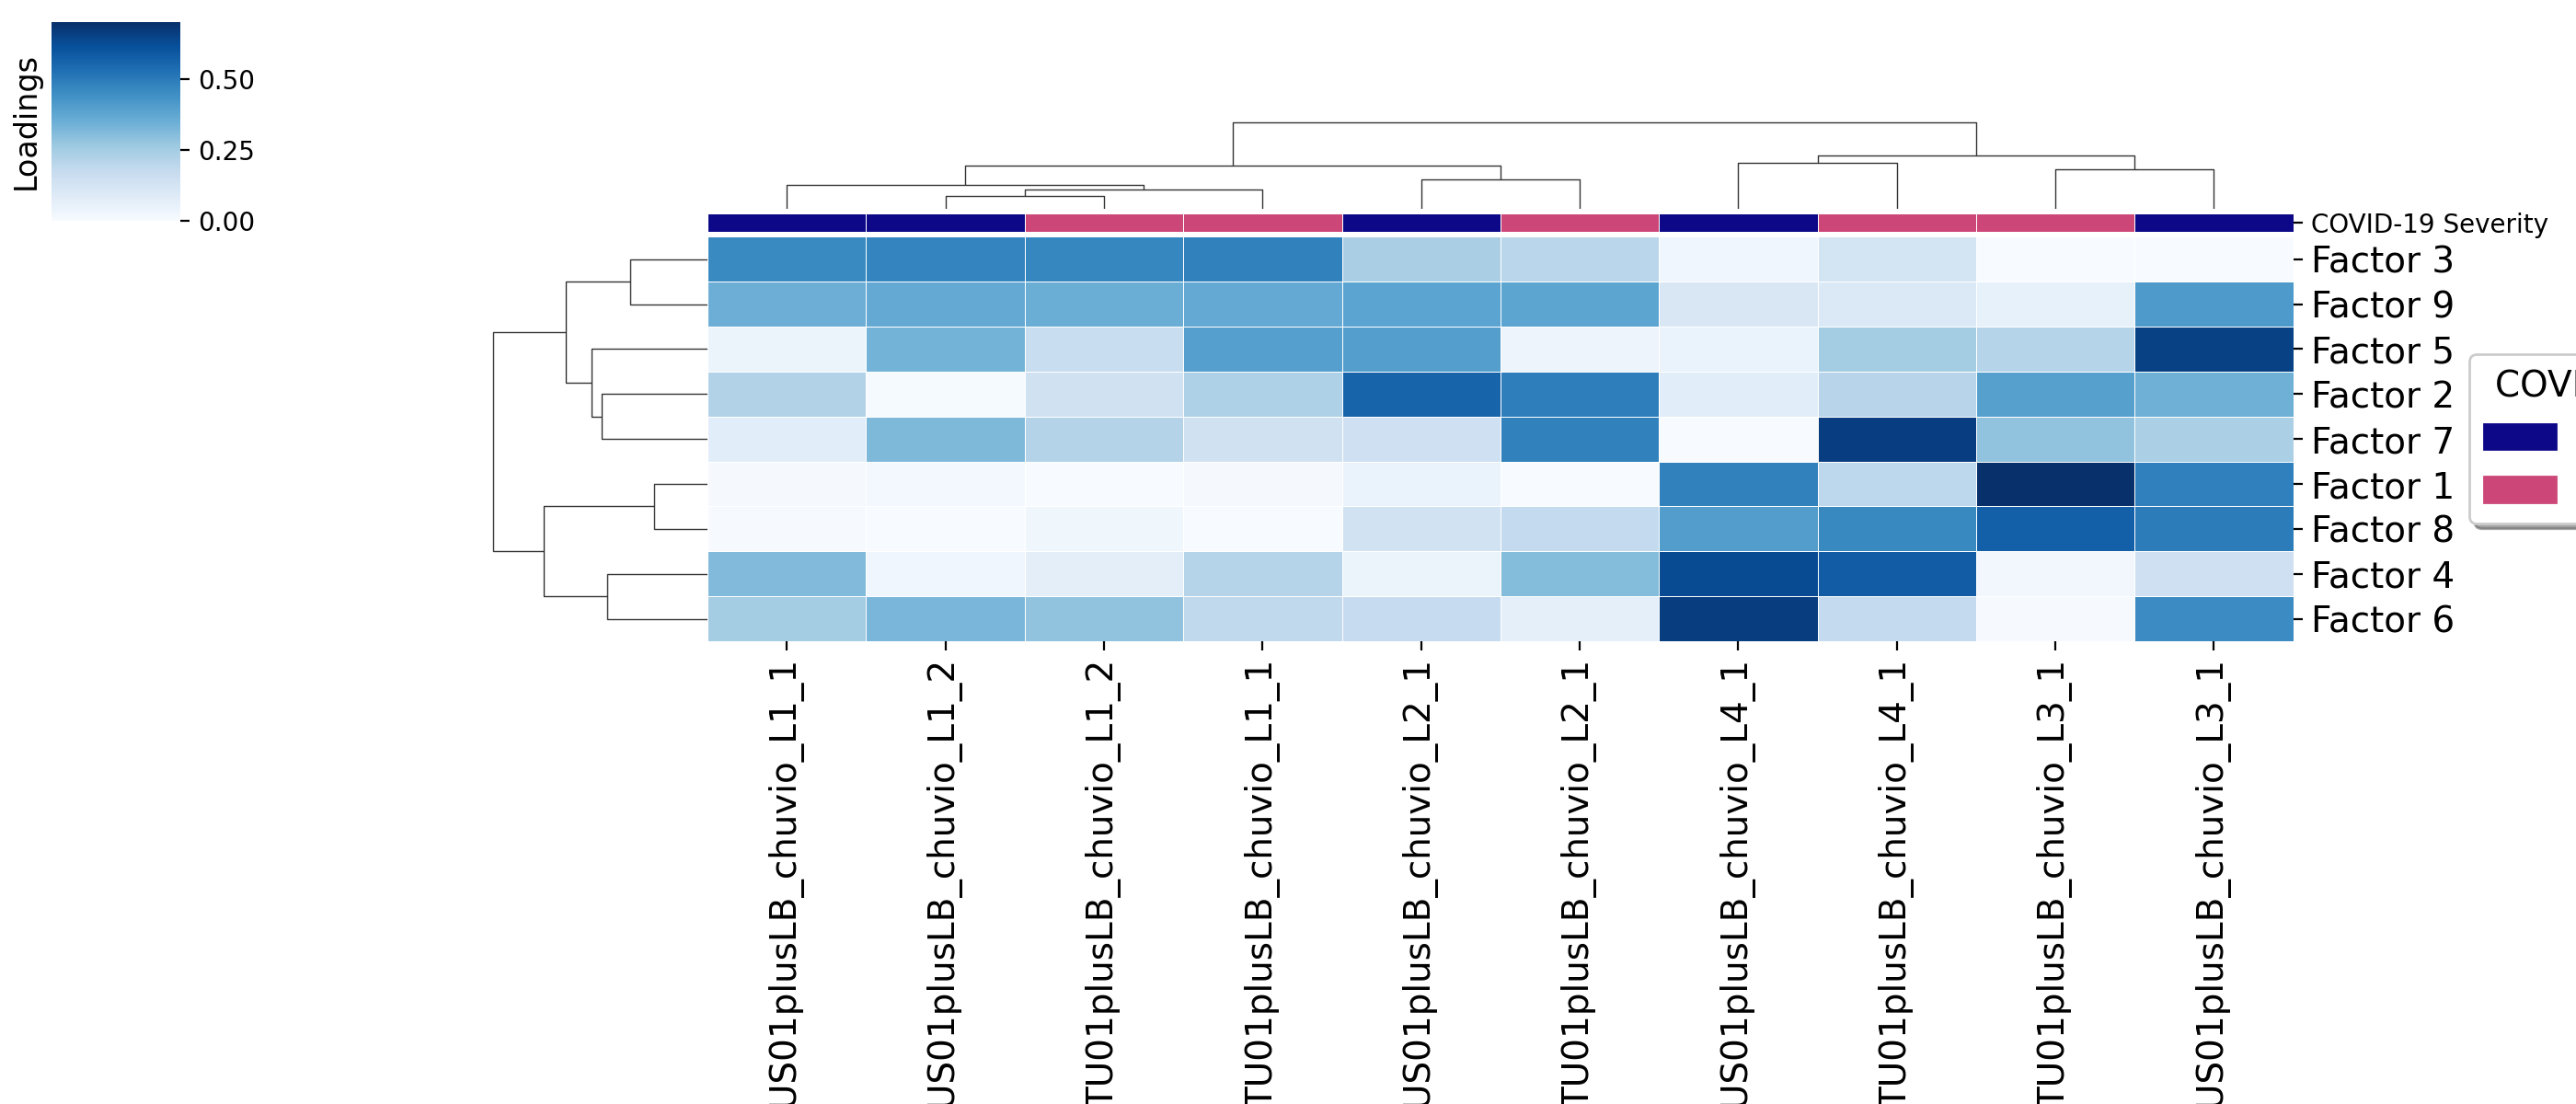

In [117]:
sample_cm = c2c.plotting.loading_clustermap(factors['Contexts'],
                                            use_zscore=False, # Whether standardizing the loadings across factors
                                            col_colors=col_colors, # Change this to color by other properties
                                            figsize=(14, 6),
                                            dendrogram_ratio=0.3,
                                            cbar_fontsize=12,
                                            tick_fontsize=14,
                                            filename=output_folder + 'Clustermap-Contexts.pdf'
                                           )

#Insert legend
plt.sca(sample_cm.ax_heatmap)
legend = c2c.plotting.aesthetics.generate_legend(color_dict=condition_colors,
                                                 bbox_to_anchor=(1.1, 0.5), # Position of the legend (X, Y)
                                                 title='COVID-19 Severity'
                                                )